# March Madness 2020

What to predict

Stage 1 - You should submit predicted probabilities for every possible matchup in the past 5 NCAA® tournaments (seasons 2015-2019).

Stage 2 - You should submit predicted probabilities for every possible matchup before the 2020 tournament begins.

Refer to the Timeline page for specific dates. In both stages, the sample submission will tell you which games to predict.

### Data 1 : Basics
- Teams
- Seasons
- Tourney Seeds
- Season Compact Results 
- TOurney Compact Results

### Data 2 : Team Box Results
- Season Detailed Results
- Tourney Detailed Results

### Data 3 : Geography
- cities
- gameCities

### Data 4 : Public Rankings
- masseyOrdinals

### Data 5 : Play by play
- Events (2015 -2019)

### Data 6 : Supplements
- team Coaches
- conferences
- teamConferences
- conference Tourney Games
- Secondary Tourney Teams
- Secondary Tourney Compact Results
- Team Spellings
- Tourney Slots
- Tourney seed round slots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datadir = './data-2020-mens'
stage1Dir = '/MDataFiles_Stage1'
working_dir = datadir+stage1Dir

#--- STAGE -1
seasons_path = working_dir+'/MSeasons.csv'
teams_path = working_dir+'/MTeams.csv'
reg_season_compact_results_path = working_dir+'/MRegularSeasonCompactResults.csv'
reg_season_detailed_results_path = working_dir+'/MRegularSeasonDetailedResults.csv'
tourney_compact_results_path = working_dir+'/MNCAATourneyCompactResults.csv'
tourney_detailed_results_path = working_dir+'/MNCAATourneyDetailedResults.csv'
tourney_seeds_path = working_dir+'/MNCAATourneySeeds.csv'
tourney_slots_path = working_dir+'/MNCAATourneySlots.csv'


citiesPath = working_dir+'/Cities.csv'
conferencesPath = working_dir+'/Conferences.csv'
conferenceTourneyGamesPath = working_dir+'/MConferenceTourneyGames.csv'
gameCitiesPath = working_dir+'/MGameCities.csv'
masseyOrdinalsPath = working_dir+'/MMasseyOrdinals.csv'
tourneyseedRoundSlotsPath = working_dir+'/MNCAATourneySeedRoundSlots.csv'
secondaryTourneyCompactResults = working_dir+'/MSecondaryTourneyCompactResults.csv'
secondaryTourneyTeams = working_dir+'/MSecondaryTourneyTeams.csv'
teamCoachesPath = working_dir+'/MTeamCoaches.csv'
teamConferencesPath = working_dir+'/MTeamConferences.csv'
teamSpellingsPath = working_dir+'/MTeamSpellings.csv'

events2015Path = datadir+'/MEvents2015.csv'
events2016Path = datadir+'/MEvents2016.csv'
events2017Path = datadir+'/MEvents2017.csv'
events2018Path = datadir+'/MEvents2018.csv'
events2019Path = datadir+'/MEvents2019.csv'
playersPath = datadir+'/Mplayers.csv'


In [3]:
seasons_df = pd.read_csv(seasons_path)
teams_df = pd.read_csv(teams_path)
RSCR_df = pd.read_csv(reg_season_compact_results_path)
RSDR_df = pd.read_csv(reg_season_detailed_results_path)
tcr_df = pd.read_csv(tourney_compact_results_path)
tdr_df = pd.read_csv(tourney_detailed_results_path)
tseeds_df = pd.read_csv(tourney_seeds_path)
tslots_df = pd.read_csv(tourney_slots_path)

In [19]:
#--- 2020 details
citiesDF = pd.read_csv(citiesPath)
conferencesDF = pd.read_csv(conferencesPath)
confTourneyGamesDF = pd.read_csv(conferenceTourneyGamesPath)
gameCitiesDF = pd.read_csv(gameCitiesPath)
MOrdDF = pd.read_csv(masseyOrdinalsPath)
tourSeedRoundsDF = pd.read_csv(tourneyseedRoundSlotsPath)

#--- events
e2015 = pd.read_csv(events2015Path)
e2016 = pd.read_csv(events2016Path)
e2017 = pd.read_csv(events2017Path)
e2018 = pd.read_csv(events2018Path)
e2019 = pd.read_csv(events2019Path)

#--- Secondary tourney
teams2DF = pd.read_csv(secondaryTourneyTeams)
TCR2DF = pd.read_csv(secondaryTourneyCompactResults)

#---Team Related
playersDF = pd.read_csv(playersPath) #--- total players : 13338
coachesDF = pd.read_csv(teamCoachesPath)#--- total : 11348
teamConfDF = pd.read_csv(teamConferencesPath)#--- confDetails

In [26]:
teamSpellings = pd.read_csv(teamSpellingsPath, encoding='cp437')#--- 1143

In [4]:
#--- teams with first and last season in a year
teams_df[(teams_df['FirstD1Season'] == 1985) & (teams_df['LastD1Season'] == 2020)]

,TeamID,TeamName,FirstD1Season,LastD1Season
1,1102,Air Force,1985,2020
2,1103,Akron,1985,2020
3,1104,Alabama,1985,2020
5,1106,Alabama St,1985,2020
7,1108,Alcorn St,1985,2020
...,...,...,...,...
357,1458,Wisconsin,1985,2020
360,1461,Wyoming,1985,2020
361,1462,Xavier,1985,2020
362,1463,Yale,1985,2020


In [18]:
teamConfDF.head()
#len(teamConfDF)

,Season,TeamID,ConfAbbrev
0,1985,1102,wac
1,1985,1103,ovc
2,1985,1104,sec
3,1985,1106,swac
4,1985,1108,swac


In [27]:
teamSpellings.head()

,TeamNameSpelling,TeamID
0,a&m-corpus chris,1394
1,a&m-corpus christi,1394
2,abilene chr,1101
3,abilene christian,1101
4,abilene-christian,1101


In [28]:
e2015.head()

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,1,2015,11,1103,1420,74,57,0,0,19,1103,100,miss3,unk,0,0,0
1,2,2015,11,1103,1420,74,57,0,0,19,1420,11784,reb,def,0,0,0
2,3,2015,11,1103,1420,74,57,0,0,27,1420,11789,made2,dunk,0,0,0
3,4,2015,11,1103,1420,74,57,0,0,27,1420,11803,assist,NaN,0,0,0
4,5,2015,11,1103,1420,74,57,0,0,59,1103,87,made2,jump,0,0,0


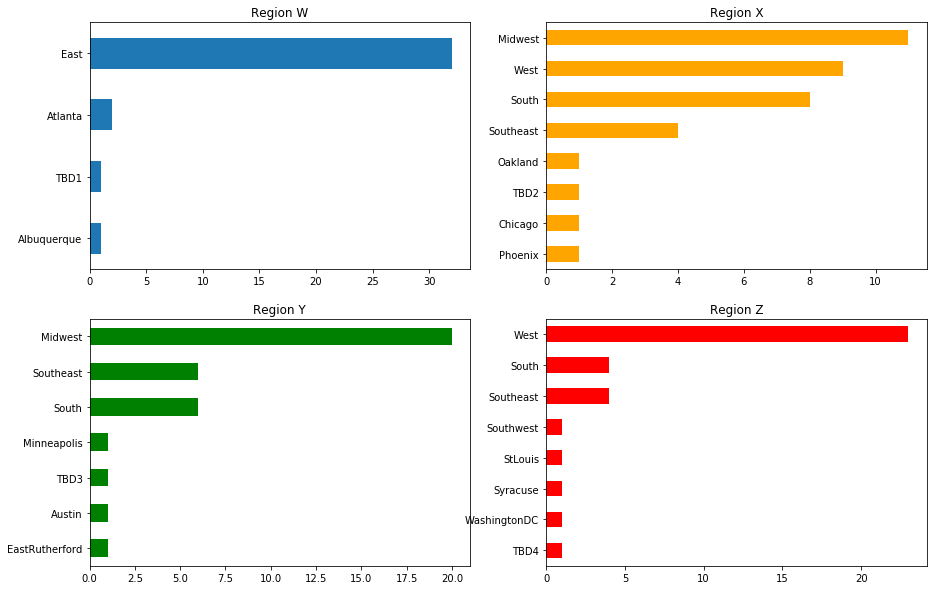

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
seasons_df['RegionW'].value_counts().sort_values().plot(kind='barh', title='Region W', ax=axs[0,0])
seasons_df['RegionX'].value_counts().sort_values().plot(kind='barh', title='Region X', ax=axs[0,1],color='Orange')
seasons_df['RegionY'].value_counts().sort_values().plot(kind='barh', title='Region Y', ax=axs[1,0],color='Green')
seasons_df['RegionZ'].value_counts().sort_values().plot(kind='barh', title='Region Z', ax=axs[1,1],color='Red')
plt.show()

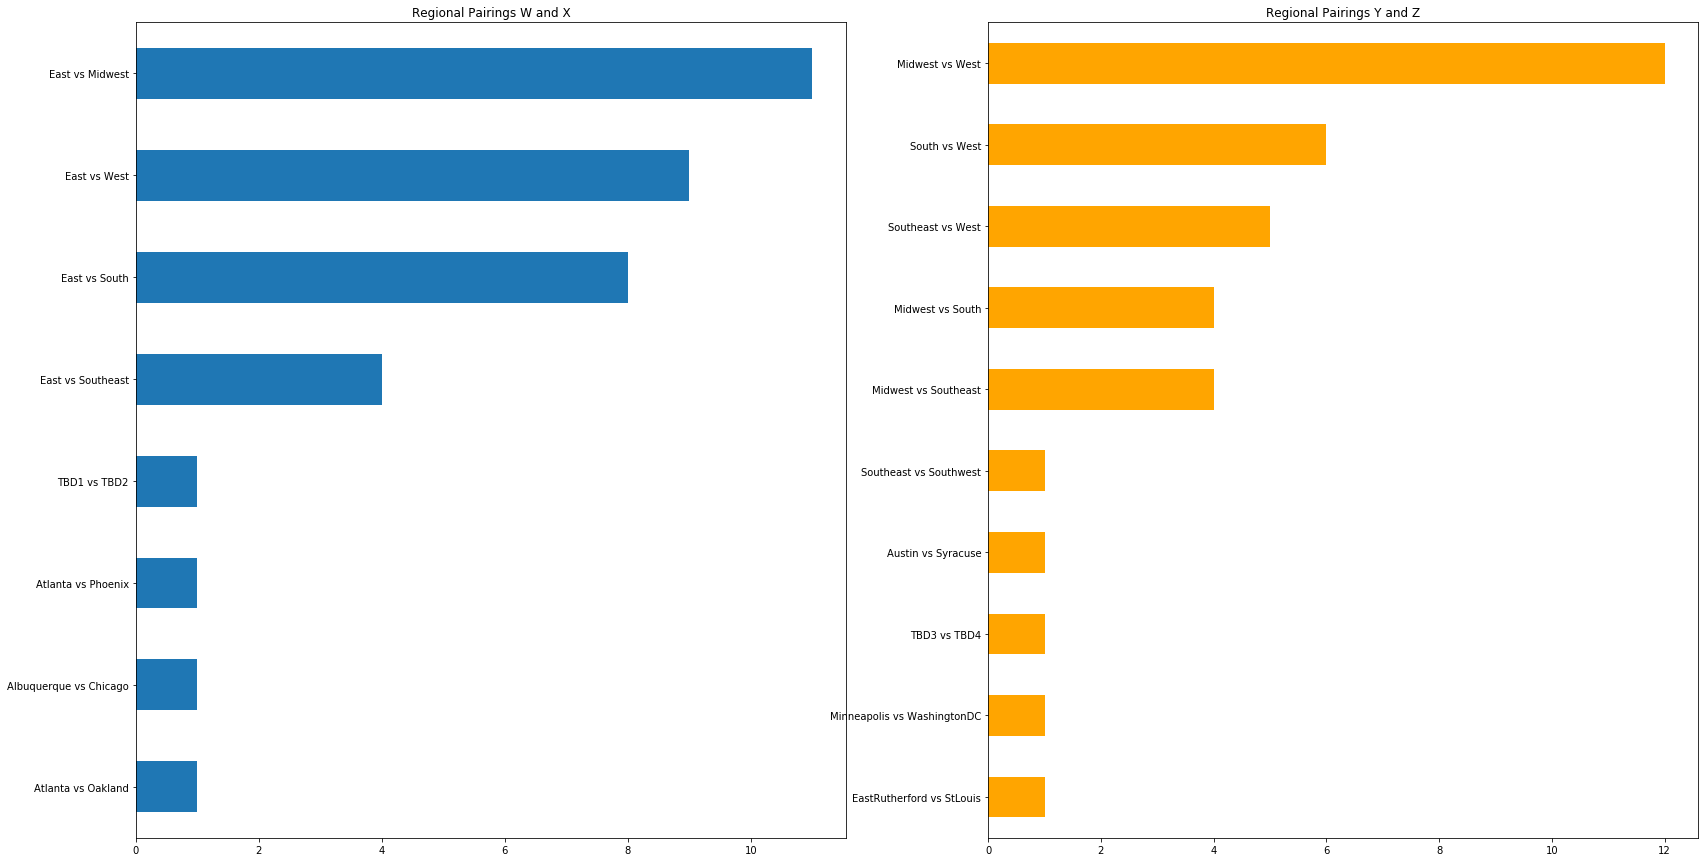

In [83]:
#--- most frequent regional Pairings
fig, axs = plt.subplots(1, 2, figsize=(28,15))
pairingsDF = seasons_df.copy()
pairingsDF['W vs X'] = seasons_df['RegionW'] + ' vs ' + seasons_df['RegionX']
pairingsDF['Y vs Z'] = seasons_df['RegionY'] + ' vs ' + seasons_df['RegionZ']
pairingsDF = pairingsDF[['Season','W vs X','Y vs Z']]
pairingsDF['W vs X'].value_counts().sort_values().plot(kind='barh',title='Regional Pairings W and X',ax=axs[0])
pairingsDF['Y vs Z'].value_counts().sort_values().plot(kind='barh',title='Regional Pairings Y and Z',ax=axs[1], color='orange')
plt.show()

In [91]:
RSCR_df = RSCR_df.merge(teams_df[['TeamName','TeamID']],
                       left_on = 'WTeamID',
                       right_on = 'TeamID',
                       validate='many_to_one').drop('TeamID', axis=1).rename(columns={'TeamName': 'WTeamName'}).merge(teams_df[['TeamName','TeamID']],
                       left_on = 'LTeamID',
                       right_on = 'TeamID',
                       validate='many_to_one').drop('TeamID', axis=1).rename(columns={'TeamName': 'LTeamName'})
#RSCR_df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName
0,1985,20,1228,81,1328,64,N,0,Illinois,Oklahoma
1,1985,33,1228,73,1328,70,H,0,Illinois,Oklahoma
2,1990,82,1112,78,1328,74,H,0,Arizona,Oklahoma
3,2011,34,1112,83,1328,60,H,0,Arizona,Oklahoma
4,1985,118,1242,82,1328,76,H,0,Kansas,Oklahoma


Final day of season :  132


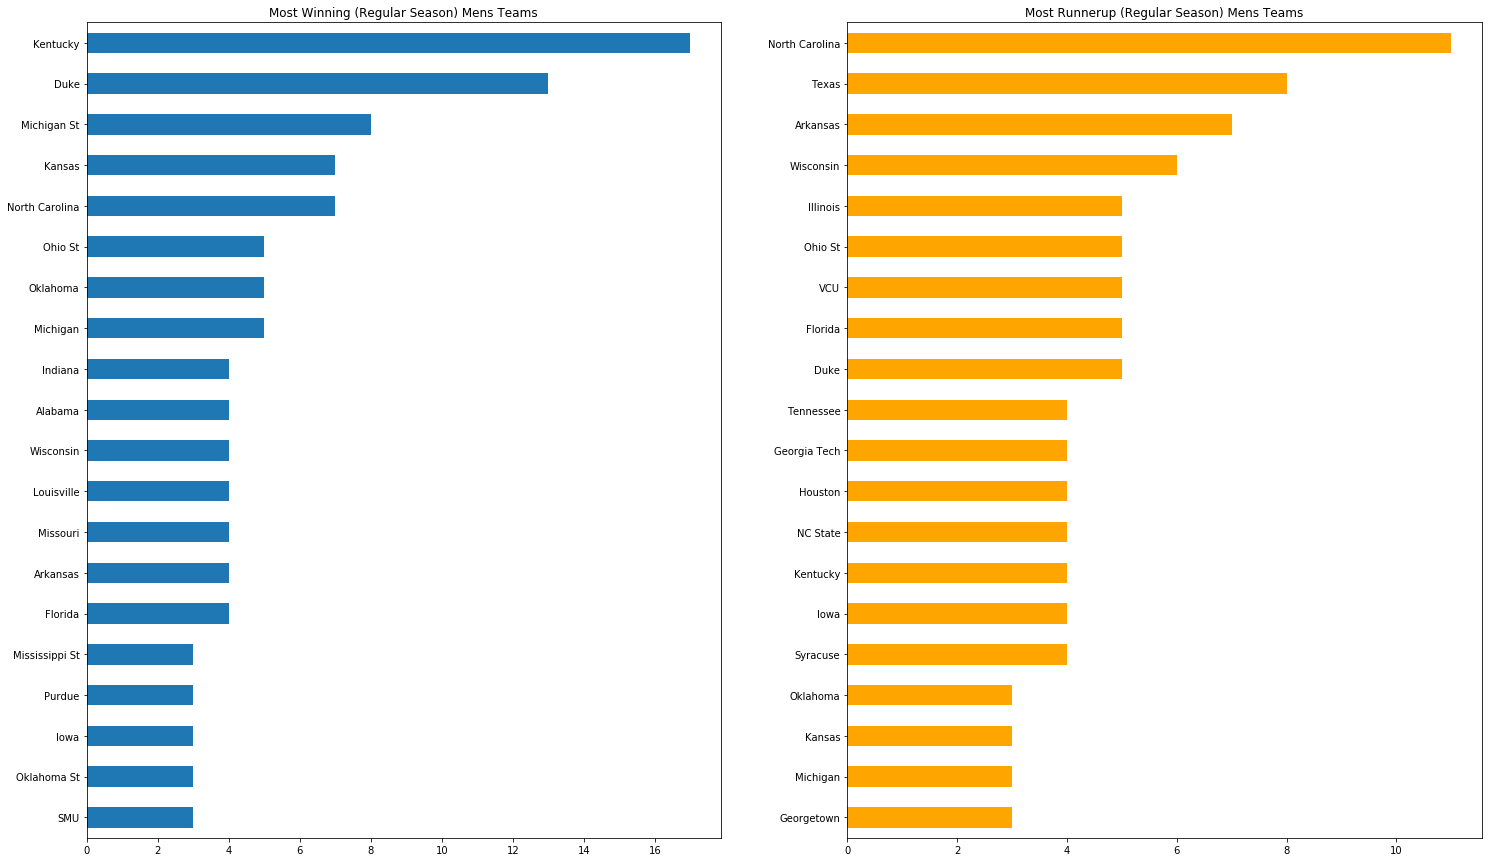

In [96]:
fig, axs = plt.subplots(1, 2, figsize=(25,15))
max_day = max(RSCR_df['DayNum'])
print('Final day of season : ',max_day)
season_finale_df = RSCR_df[RSCR_df['DayNum'] ==  max_day]
season_finale_df['WTeamName'].value_counts().sort_values().tail(20).plot(kind='barh',title='Most Winning (Regular Season) Mens Teams',ax=axs[0])
season_finale_df['LTeamName'].value_counts().sort_values().tail(20).plot(kind='barh',title='Most Runnerup (Regular Season) Mens Teams',ax=axs[1],color='orange')
plt.show()

In [97]:
tcr_df = tcr_df.merge(teams_df[['TeamName','TeamID']],
                       left_on = 'WTeamID',
                       right_on = 'TeamID',
                       validate='many_to_one').drop('TeamID', axis=1).rename(columns={'TeamName': 'WTeamName'}).merge(teams_df[['TeamName','TeamID']],
                       left_on = 'LTeamID',
                       right_on = 'TeamID',
                       validate='many_to_one').drop('TeamID', axis=1).rename(columns={'TeamName': 'LTeamName'})
#tcr_df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName
0,1985,136,1116,63,1234,54,N,0,Arkansas,Iowa
1,1997,138,1246,75,1234,69,N,0,Kentucky,Iowa
2,2001,138,1246,92,1234,79,N,0,Kentucky,Iowa
3,1987,146,1424,84,1234,81,N,0,UNLV,Iowa
4,1991,138,1181,85,1234,70,N,0,Duke,Iowa


Final day of Tournament :  154


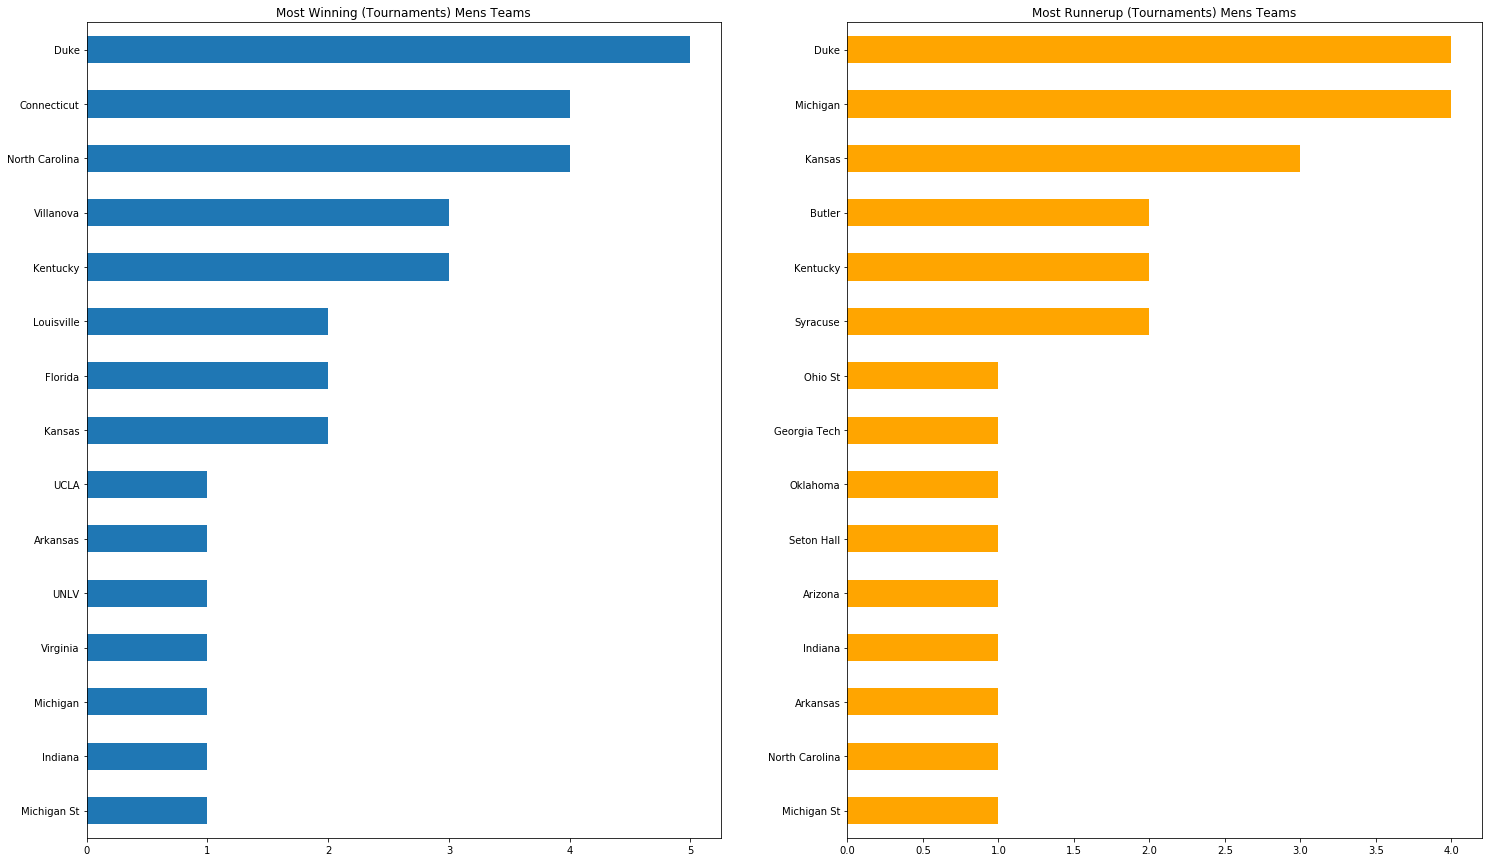

In [110]:
fig, axs = plt.subplots(1, 2, figsize=(25,15))
max_day = max(tcr_df['DayNum'])
print('Final day of Tournament : ',max_day)
t_finale_df = tcr_df[tcr_df['DayNum'] ==  max_day]
t_finale_df['WTeamName'].value_counts().sort_values().tail(15).plot(kind='barh',title='Most Winning (Tournaments) Mens Teams',ax=axs[0])
t_finale_df['LTeamName'].value_counts().sort_values().tail(15).plot(kind='barh',title='Most Runnerup (Tournaments) Mens Teams',ax=axs[1],color='orange')
plt.show()

In [101]:
def getSeed(season, teamId):
    return tseeds_df[(tseeds_df['Season'] == season) & (tseeds_df['TeamID'] == teamId)]['Seed'].str[1:3].apply(pd.to_numeric).values[0]

In [106]:
t_finale_df['Wseed'] = np.vectorize(getSeed)(t_finale_df['Season'], t_finale_df['WTeamID'])
t_finale_df['Lseed'] = np.vectorize(getSeed)(t_finale_df['Season'], t_finale_df['LTeamID'])
t_finale_df.head()

C:\Users\heram\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\heram\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,Wseed,Lseed
56,2016,154,1437,77,1314,74,N,0,Villanova,North Carolina,2,1
176,1985,154,1437,66,1207,64,N,0,Villanova,Georgetown,8,1
205,1993,154,1314,77,1276,71,N,0,North Carolina,Michigan,1,1
208,1992,154,1181,71,1276,51,N,0,Duke,Michigan,1,6
211,2018,154,1437,79,1276,62,N,0,Villanova,Michigan,1,3


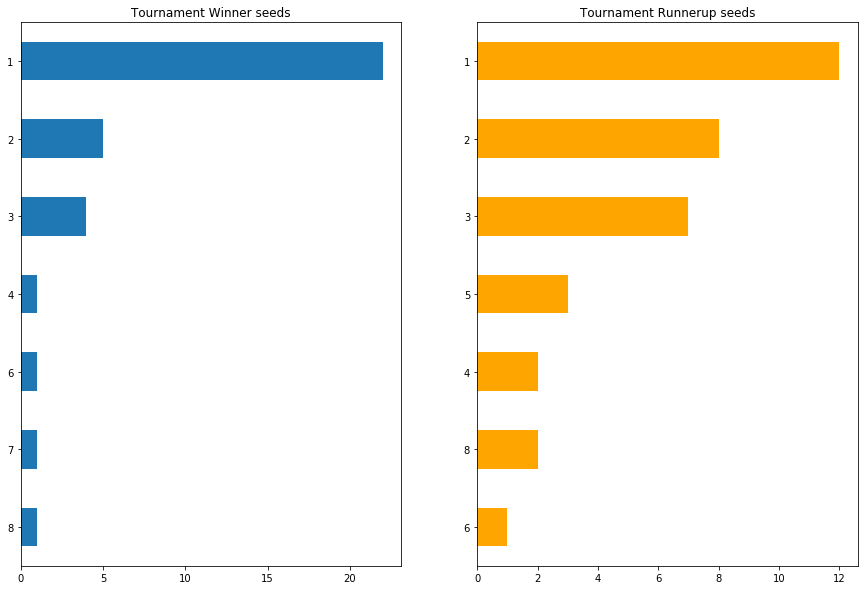

In [109]:
#--- title winner seeds
fig, axs = plt.subplots(1, 2, figsize=(15,10))
t_finale_df['Wseed'].value_counts().sort_values().plot(kind='barh',title='Tournament Winner seeds',ax=axs[0])
t_finale_df['Lseed'].value_counts().sort_values().plot(kind='barh',title='Tournament Runnerup seeds',ax=axs[1],color='orange')
plt.show()